Classification: Image Classification**: CNN on CIFAR-10 Dataset (60,000 images)

---

### Classification Tasks:
1. **Image Classification**: CNN on CIFAR-10 Dataset (60,000 images)
2. **Tabular Classification**: Random Forest, SVM, XGBoost on Adult Income Dataset (48,842 rows)

---

## 1. Import Required Libraries

In [1]:
# Install required packages (uncomment if needed)
!pip install tensorflow scikit-learn xgboost pandas numpy matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)

print(f"TensorFlow Version: {tf.__version__}")
print("All libraries imported successfully!")

TensorFlow Version: 2.19.0
All libraries imported successfully!


---
# PART 1: CNN on Image Dataset (CIFAR-10)

## Dataset Information:
- **Dataset Name**: CIFAR-10
- **Dataset Link**: https://www.cs.toronto.edu/~kriz/cifar.html
- **Number of Images**: 60,000 (50,000 training + 10,000 test)
- **Image Size**: 32x32 pixels, RGB (3 channels)
- **Number of Classes**: 10
- **Target Variable**: Object category (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
- **Description**: The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. The dataset is commonly used for benchmarking machine learning algorithms.
- **Purpose**: Image classification and object recognition

In [2]:
# Load CIFAR-10 Dataset
(X_train_img, y_train_img), (X_test_img, y_test_img) = keras.datasets.cifar10.load_data()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Dataset Information
print("=" * 60)
print("CIFAR-10 DATASET INFORMATION")
print("=" * 60)
print(f"Dataset Link: https://www.cs.toronto.edu/~kriz/cifar.html")
print(f"Training Images: {X_train_img.shape[0]}")
print(f"Test Images: {X_test_img.shape[0]}")
print(f"Total Images: {X_train_img.shape[0] + X_test_img.shape[0]}")
print(f"Image Shape: {X_train_img.shape[1:]}")
print(f"Number of Classes: {len(np.unique(y_train_img))}")
print(f"Classes: {class_names}")
print(f"Target Variable: Object Category")
print("=" * 60)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step
CIFAR-10 DATASET INFORMATION
Dataset Link: https://www.cs.toronto.edu/~kriz/cifar.html
Training Images: 50000
Test Images: 10000
Total Images: 60000
Image Shape: (32, 32, 3)
Number of Classes: 10
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Target Variable: Object Category


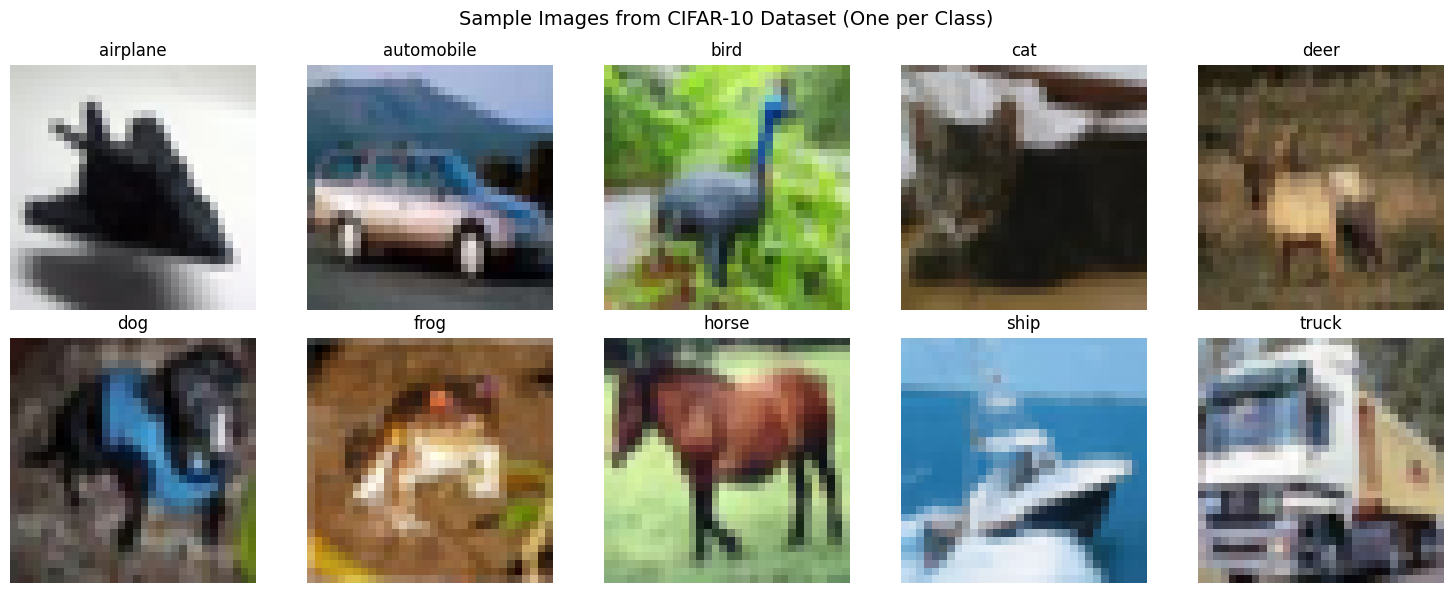

In [3]:
# Visualize sample images from each class
plt.figure(figsize=(15, 6))
for i in range(10):
    # Find first image of each class
    idx = np.where(y_train_img.flatten() == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_img[idx])
    plt.title(f"{class_names[i]}")
    plt.axis('off')
plt.suptitle('Sample Images from CIFAR-10 Dataset (One per Class)', fontsize=14)
plt.tight_layout()
plt.show()

In [4]:
# Data Preprocessing
# Normalize pixel values to [0, 1]
X_train_norm = X_train_img.astype('float32') / 255.0
X_test_norm = X_test_img.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train_img, num_classes)
y_test_cat = keras.utils.to_categorical(y_test_img, num_classes)

print(f"Normalized X_train shape: {X_train_norm.shape}")
print(f"Normalized X_train range: [{X_train_norm.min()}, {X_train_norm.max()}]")
print(f"One-hot encoded y_train shape: {y_train_cat.shape}")

Normalized X_train shape: (50000, 32, 32, 3)
Normalized X_train range: [0.0, 1.0]
One-hot encoded y_train shape: (50000, 10)


In [5]:
# Data Augmentation for improved generalization (Optimization Technique 1)
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1)
], name='data_augmentation')

print("Data Augmentation layer created successfully!")
print("Augmentation techniques: Horizontal Flip, Rotation, Zoom, Translation")

Data Augmentation layer created successfully!
Augmentation techniques: Horizontal Flip, Rotation, Zoom, Translation


In [6]:
# Build CNN Model with Optimization Techniques
def build_cnn_model():
    model = models.Sequential([
        # Input layer
        layers.InputLayer(input_shape=(32, 32, 3)),

        # Data Augmentation (Optimization Technique 1)
        data_augmentation,

        # First Convolutional Block
        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),  # Optimization Technique 2
        layers.Activation('relu'),
        layers.Conv2D(32, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),  # Optimization Technique 3

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

cnn_model = build_cnn_model()
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [7]:
# Compile the model with Adam optimizer
cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for optimization (Optimization Techniques 4 & 5)
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

print("Model compiled successfully!")
print("\nOptimization Techniques Applied:")
print("1. Data Augmentation (RandomFlip, RandomRotation, RandomZoom, RandomTranslation)")
print("2. Batch Normalization")
print("3. Dropout Regularization (0.25, 0.5)")
print("4. Early Stopping (patience=10)")
print("5. Learning Rate Reduction on Plateau (factor=0.5, patience=5)")

Model compiled successfully!

Optimization Techniques Applied:
1. Data Augmentation (RandomFlip, RandomRotation, RandomZoom, RandomTranslation)
2. Batch Normalization
3. Dropout Regularization (0.25, 0.5)
4. Early Stopping (patience=10)
5. Learning Rate Reduction on Plateau (factor=0.5, patience=5)


In [8]:
# Train the CNN Model
print("Training CNN Model...")
print("This may take several minutes...\n")

history = cnn_model.fit(
    X_train_norm, y_train_cat,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

print("\nTraining completed!")

Training CNN Model...
This may take several minutes...

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.3053 - loss: 2.0459 - val_accuracy: 0.5105 - val_loss: 1.3471 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4732 - loss: 1.4625 - val_accuracy: 0.4966 - val_loss: 1.6010 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5338 - loss: 1.2945 - val_accuracy: 0.6268 - val_loss: 1.0520 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5784 - loss: 1.1714 - val_accuracy: 0.5428 - val_loss: 1.3498 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6176 - loss: 1.0862 - val_accuracy: 0.5645 - val_loss: 1.3617 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6348 - loss: 1.0346 - val_accuracy: 0.6300 - val_loss: 1.1146 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━

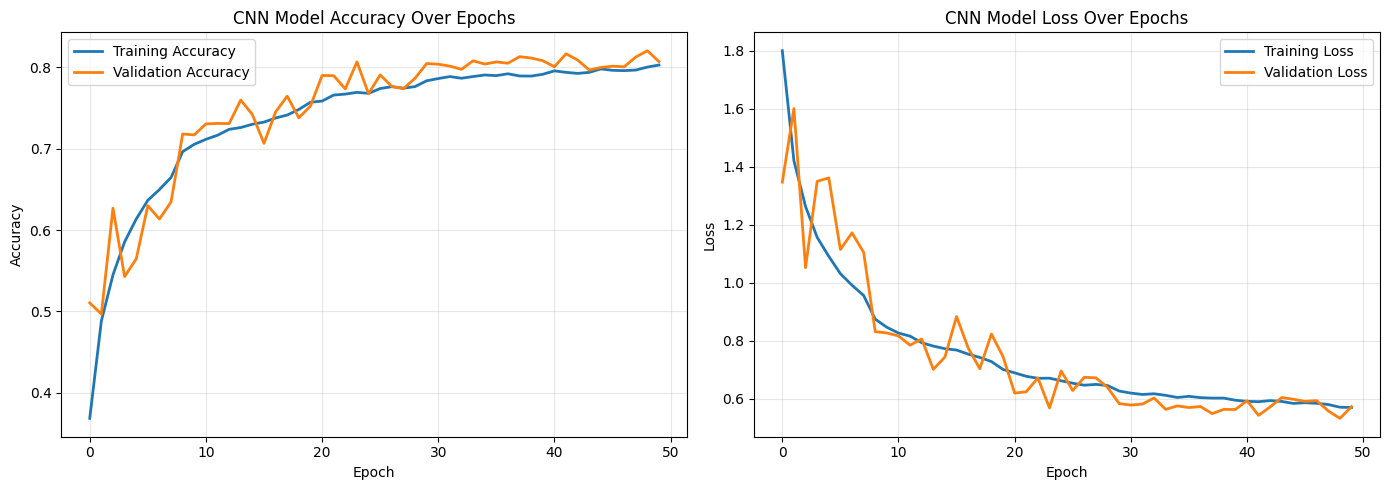

In [9]:
# Plot Training History
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('CNN Model Accuracy Over Epochs', fontsize=12)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('CNN Model Loss Over Epochs', fontsize=12)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# Evaluate CNN Model on Test Set
print("Evaluating CNN Model on Test Set...")

y_pred_proba_cnn = cnn_model.predict(X_test_norm, verbose=0)
y_pred_cnn = np.argmax(y_pred_proba_cnn, axis=1)
y_true_cnn = y_test_img.flatten()

# Calculate Metrics
accuracy_cnn = accuracy_score(y_true_cnn, y_pred_cnn)
precision_cnn = precision_score(y_true_cnn, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_true_cnn, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_true_cnn, y_pred_cnn, average='weighted')
auc_cnn = roc_auc_score(y_test_cat, y_pred_proba_cnn, multi_class='ovr', average='weighted')

print("\n" + "=" * 60)
print("CNN CLASSIFICATION RESULTS (CIFAR-10)")
print("=" * 60)
print(f"Accuracy:  {accuracy_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall:    {recall_cnn:.4f}")
print(f"F1 Score:  {f1_cnn:.4f}")
print(f"AUC:       {auc_cnn:.4f}")
print("=" * 60)

Evaluating CNN Model on Test Set...

CNN CLASSIFICATION RESULTS (CIFAR-10)
Accuracy:  0.8102
Precision: 0.8150
Recall:    0.8102
F1 Score:  0.8074
AUC:       0.9826


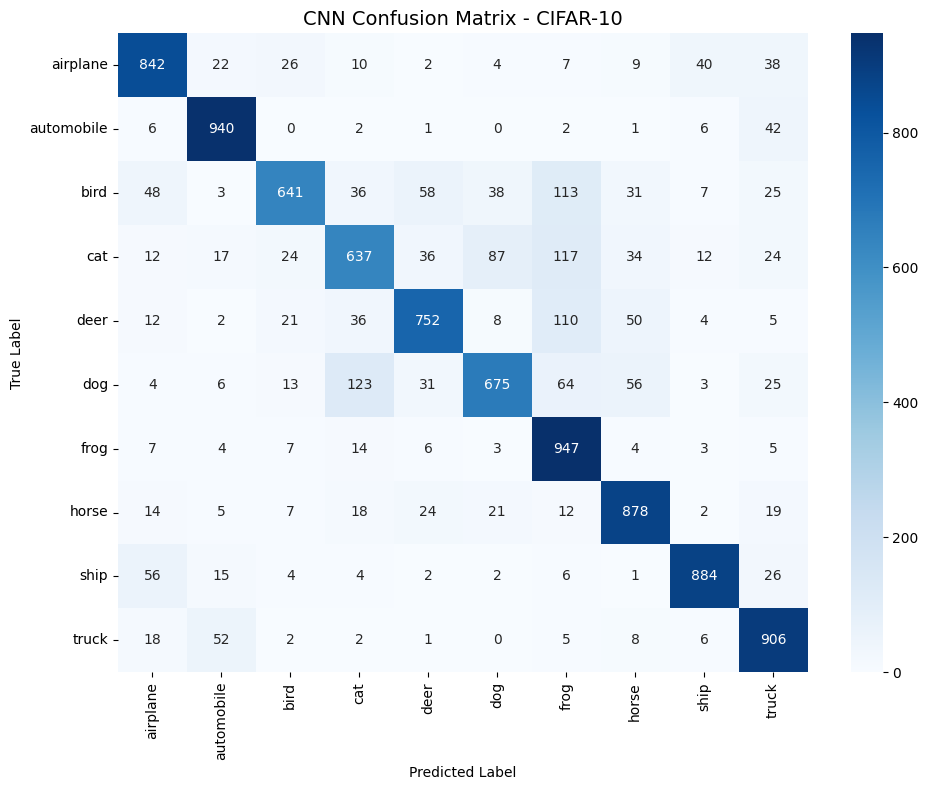

In [11]:
# Confusion Matrix for CNN
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('CNN Confusion Matrix - CIFAR-10', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [12]:
# Detailed Classification Report for CNN
print("\nDetailed Classification Report (CNN - CIFAR-10):")
print("=" * 60)
print(classification_report(y_true_cnn, y_pred_cnn, target_names=class_names))


Detailed Classification Report (CNN - CIFAR-10):
              precision    recall  f1-score   support

    airplane       0.83      0.84      0.83      1000
  automobile       0.88      0.94      0.91      1000
        bird       0.86      0.64      0.73      1000
         cat       0.72      0.64      0.68      1000
        deer       0.82      0.75      0.79      1000
         dog       0.81      0.68      0.73      1000
        frog       0.68      0.95      0.79      1000
       horse       0.82      0.88      0.85      1000
        ship       0.91      0.88      0.90      1000
       truck       0.81      0.91      0.86      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



---
# PART 2: Tabular Classification (Random Forest, SVM, XGBoost)

## Dataset Information:
- **Dataset Name**: Adult Income (Census Income) Dataset
- **Dataset Link**: https://archive.ics.uci.edu/ml/datasets/adult
- **Number of Samples (Rows)**: 48,842
- **Number of Features (Columns)**: 14
- **Target Variable**: Income (Binary: >50K or <=50K)
- **Description**: This dataset was extracted from the 1994 Census database. The prediction task is to determine whether a person makes over $50K a year based on census attributes.
- **Purpose**: Binary classification for income prediction

In [13]:
# Load Adult Income Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df = pd.read_csv(url, names=column_names, sep=',\s*', engine='python', na_values='?')

print("=" * 70)
print("ADULT INCOME DATASET INFORMATION")
print("=" * 70)
print(f"Dataset Link: https://archive.ics.uci.edu/ml/datasets/adult")
print(f"Number of Samples (Rows): {df.shape[0]}")
print(f"Number of Features (Columns): {df.shape[1] - 1}")
print(f"Target Variable: income (>50K or <=50K)")
print("=" * 70)

ADULT INCOME DATASET INFORMATION
Dataset Link: https://archive.ics.uci.edu/ml/datasets/adult
Number of Samples (Rows): 32561
Number of Features (Columns): 14
Target Variable: income (>50K or <=50K)


In [14]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
# Feature Descriptions
print("\nFeature Descriptions:")
print("=" * 70)
feature_descriptions = {
    'age': 'Age of the individual (continuous)',
    'workclass': 'Type of employer (categorical)',
    'fnlwgt': 'Final weight - census sampling weight (continuous)',
    'education': 'Highest level of education achieved (categorical)',
    'education_num': 'Numeric representation of education level (continuous)',
    'marital_status': 'Marital status (categorical)',
    'occupation': 'Type of occupation (categorical)',
    'relationship': 'Relationship status in household (categorical)',
    'race': 'Race of the individual (categorical)',
    'sex': 'Gender of the individual (categorical)',
    'capital_gain': 'Capital gains recorded (continuous)',
    'capital_loss': 'Capital losses recorded (continuous)',
    'hours_per_week': 'Hours worked per week (continuous)',
    'native_country': 'Country of origin (categorical)',
    'income': 'TARGET: Income class >50K or <=50K (binary)'
}

for i, (feat, desc) in enumerate(feature_descriptions.items(), 1):
    print(f"{i:2}. {feat}: {desc}")


Feature Descriptions:
 1. age: Age of the individual (continuous)
 2. workclass: Type of employer (categorical)
 3. fnlwgt: Final weight - census sampling weight (continuous)
 4. education: Highest level of education achieved (categorical)
 5. education_num: Numeric representation of education level (continuous)
 6. marital_status: Marital status (categorical)
 7. occupation: Type of occupation (categorical)
 8. relationship: Relationship status in household (categorical)
 9. race: Race of the individual (categorical)
10. sex: Gender of the individual (categorical)
11. capital_gain: Capital gains recorded (continuous)
12. capital_loss: Capital losses recorded (continuous)
13. hours_per_week: Hours worked per week (continuous)
14. native_country: Country of origin (categorical)
15. income: TARGET: Income class >50K or <=50K (binary)


In [16]:
# Dataset statistics
print("\nDataset Statistics:")
df.describe()


Dataset Statistics:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Missing Values:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Total missing values: 4262


In [18]:
# Data Preprocessing
# Handle missing values
df_clean = df.dropna()
print(f"Dataset size after removing missing values: {df_clean.shape[0]}")

# Encode target variable
df_clean['income'] = df_clean['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Target distribution
print(f"\nTarget Variable Distribution:")
print(df_clean['income'].value_counts())
print(f"\nClass 0 (<=50K): {(df_clean['income']==0).sum()} ({(df_clean['income']==0).mean()*100:.1f}%)")
print(f"Class 1 (>50K):  {(df_clean['income']==1).sum()} ({(df_clean['income']==1).mean()*100:.1f}%)")

Dataset size after removing missing values: 30162

Target Variable Distribution:
income
0    22654
1     7508
Name: count, dtype: int64

Class 0 (<=50K): 22654 (75.1%)
Class 1 (>50K):  7508 (24.9%)


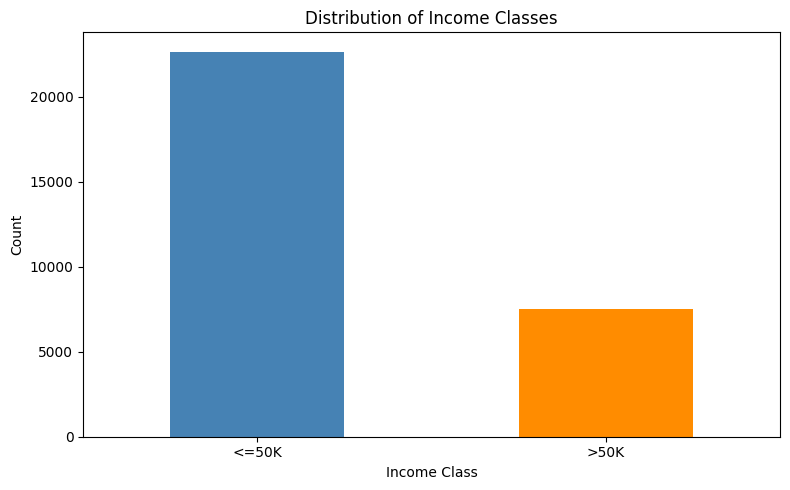

In [19]:
# Visualize target distribution
plt.figure(figsize=(8, 5))
df_clean['income'].value_counts().plot(kind='bar', color=['steelblue', 'darkorange'])
plt.title('Distribution of Income Classes')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['<=50K', '>50K'], rotation=0)
plt.tight_layout()
plt.show()

In [20]:
# Separate features and target
X = df_clean.drop('income', axis=1)
y = df_clean['income']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical features ({len(numerical_cols)}): {numerical_cols}")

Categorical features (8): ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

Numerical features (6): ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [21]:
# Label Encoding for categorical variables
label_encoders = {}
X_encoded = X.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

print("Categorical variables encoded successfully!")
print(f"\nEncoded dataset shape: {X_encoded.shape}")

Categorical variables encoded successfully!

Encoded dataset shape: (30162, 14)


In [22]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (Optimization Technique)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nFeature scaling applied using StandardScaler")

Training set size: 24129
Test set size: 6033

Feature scaling applied using StandardScaler


In [23]:
# Function to evaluate classifiers
def evaluate_classifier(model, X_test, y_test, model_name):
    """Evaluate classifier and return metrics."""
    y_pred = model.predict(X_test)

    # Get probability predictions for AUC
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }, y_pred, y_pred_proba

In [24]:
# 1. Random Forest Classifier with Hyperparameter Optimization
print("=" * 60)
print("Training Random Forest Classifier...")
print("=" * 60)

rf_model = RandomForestClassifier(
    n_estimators=200,        # Number of trees
    max_depth=15,            # Maximum depth of trees
    min_samples_split=5,     # Minimum samples to split node
    min_samples_leaf=2,      # Minimum samples in leaf
    max_features='sqrt',     # Features to consider for split
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)
rf_results, rf_pred, rf_proba = evaluate_classifier(rf_model, X_test_scaled, y_test, 'Random Forest')

print("\nOptimization Techniques Applied:")
print("- n_estimators=200 (increased from default 100)")
print("- max_depth=15 (prevents overfitting)")
print("- min_samples_split=5, min_samples_leaf=2 (regularization)")
print("\nTraining completed!")

Training Random Forest Classifier...

Optimization Techniques Applied:
- n_estimators=200 (increased from default 100)
- max_depth=15 (prevents overfitting)
- min_samples_split=5, min_samples_leaf=2 (regularization)

Training completed!


In [25]:
# 2. Support Vector Machine (SVM) Classifier
print("=" * 60)
print("Training SVM Classifier...")
print("=" * 60)

svm_model = SVC(
    kernel='rbf',           # Radial Basis Function kernel
    C=1.0,                  # Regularization parameter
    gamma='scale',          # Kernel coefficient
    probability=True,       # Enable probability estimates
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)
svm_results, svm_pred, svm_proba = evaluate_classifier(svm_model, X_test_scaled, y_test, 'SVM')

print("\nOptimization Techniques Applied:")
print("- RBF kernel (handles non-linear relationships)")
print("- Feature scaling with StandardScaler (required for SVM)")
print("- gamma='scale' (automatic gamma calculation)")
print("\nTraining completed!")

Training SVM Classifier...

Optimization Techniques Applied:
- RBF kernel (handles non-linear relationships)
- Feature scaling with StandardScaler (required for SVM)
- gamma='scale' (automatic gamma calculation)

Training completed!


In [26]:
# 3. XGBoost Classifier with Hyperparameter Optimization
print("=" * 60)
print("Training XGBoost Classifier...")
print("=" * 60)

xgb_model = XGBClassifier(
    n_estimators=200,        # Number of boosting rounds
    max_depth=6,             # Maximum tree depth
    learning_rate=0.1,       # Step size shrinkage
    subsample=0.8,           # Subsample ratio of training instances
    colsample_bytree=0.8,    # Subsample ratio of columns
    reg_alpha=0.1,           # L1 regularization
    reg_lambda=1.0,          # L2 regularization
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)
xgb_results, xgb_pred, xgb_proba = evaluate_classifier(xgb_model, X_test_scaled, y_test, 'XGBoost')

print("\nOptimization Techniques Applied:")
print("- n_estimators=200, learning_rate=0.1 (balanced learning)")
print("- subsample=0.8, colsample_bytree=0.8 (prevents overfitting)")
print("- reg_alpha=0.1, reg_lambda=1.0 (L1/L2 regularization)")
print("\nTraining completed!")

Training XGBoost Classifier...

Optimization Techniques Applied:
- n_estimators=200, learning_rate=0.1 (balanced learning)
- subsample=0.8, colsample_bytree=0.8 (prevents overfitting)
- reg_alpha=0.1, reg_lambda=1.0 (L1/L2 regularization)

Training completed!


In [27]:
# Summary of All Classification Results
results_df = pd.DataFrame([rf_results, svm_results, xgb_results])

print("\n" + "=" * 80)
print("TABULAR CLASSIFICATION RESULTS - ADULT INCOME DATASET")
print("=" * 80)
print(results_df.to_string(index=False))
print("=" * 80)


TABULAR CLASSIFICATION RESULTS - ADULT INCOME DATASET
        Model  Accuracy  Precision   Recall  F1 Score      AUC
Random Forest  0.859937   0.779099 0.610519  0.684584 0.915034
          SVM  0.841372   0.746606 0.549268  0.632911 0.888834
      XGBoost  0.863252   0.765907 0.649134  0.702703 0.922932


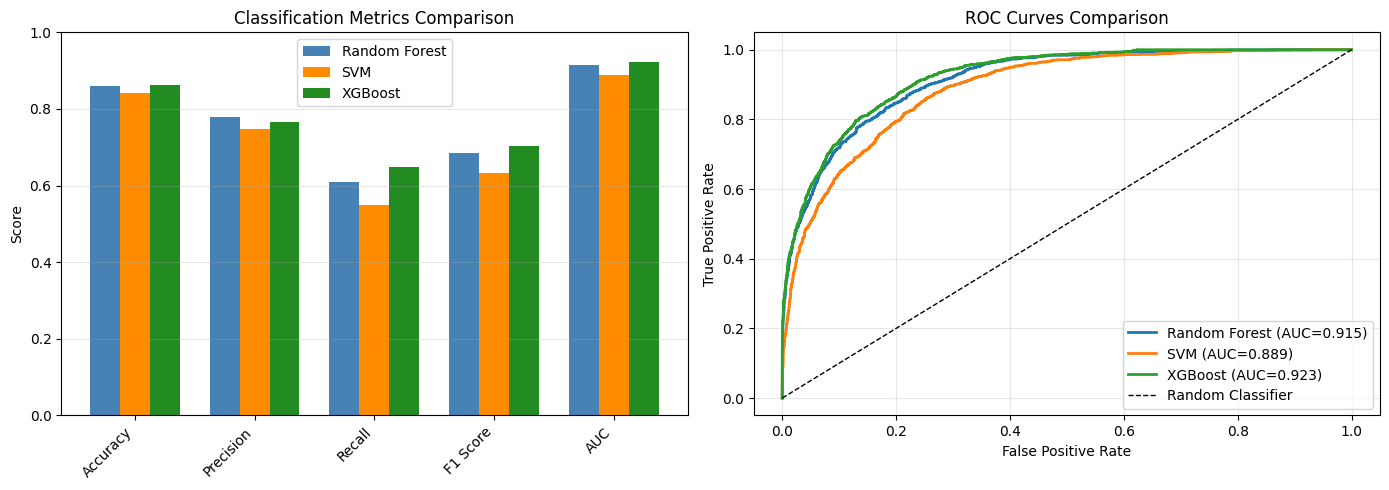

In [28]:
# Visualization of Model Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
x = np.arange(len(metrics))
width = 0.25

axes[0].bar(x - width, results_df[results_df['Model'] == 'Random Forest'][metrics].values[0],
            width, label='Random Forest', color='steelblue')
axes[0].bar(x, results_df[results_df['Model'] == 'SVM'][metrics].values[0],
            width, label='SVM', color='darkorange')
axes[0].bar(x + width, results_df[results_df['Model'] == 'XGBoost'][metrics].values[0],
            width, label='XGBoost', color='forestgreen')

axes[0].set_ylabel('Score')
axes[0].set_title('Classification Metrics Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', alpha=0.3)

# ROC Curves
for name, proba in [('Random Forest', rf_proba), ('SVM', svm_proba), ('XGBoost', xgb_proba)]:
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_val = roc_auc_score(y_test, proba)
    axes[1].plot(fpr, tpr, label=f'{name} (AUC={auc_val:.3f})', linewidth=2)

axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves Comparison')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

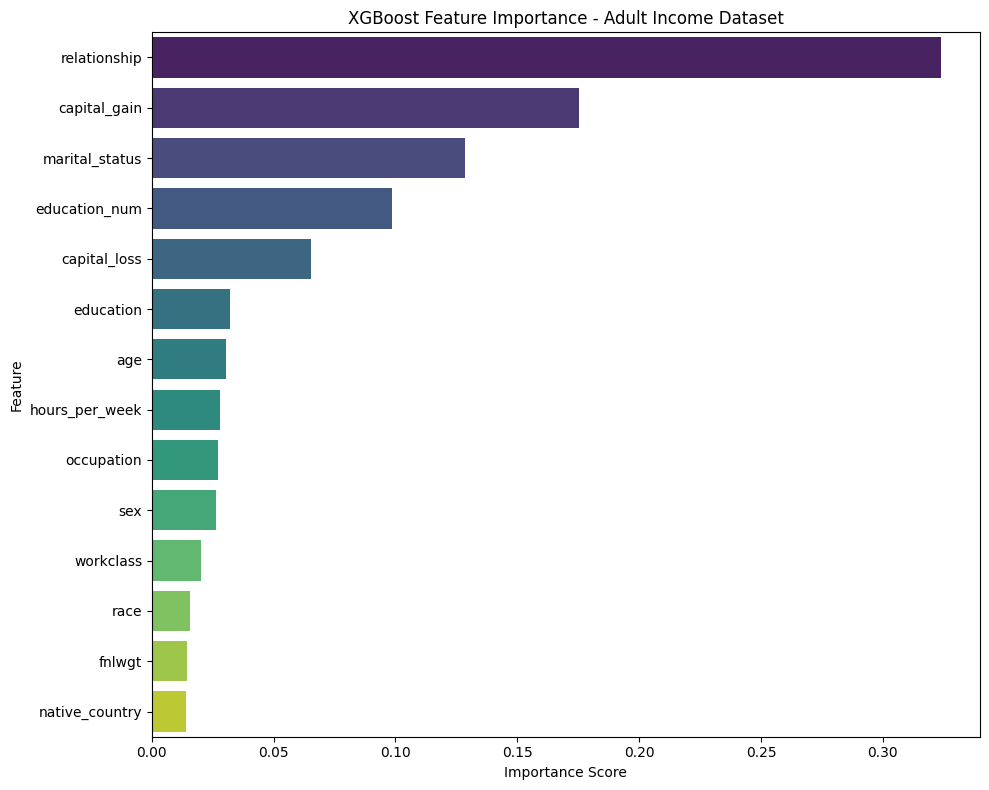

In [29]:
# Feature Importance (XGBoost)
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('XGBoost Feature Importance - Adult Income Dataset')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

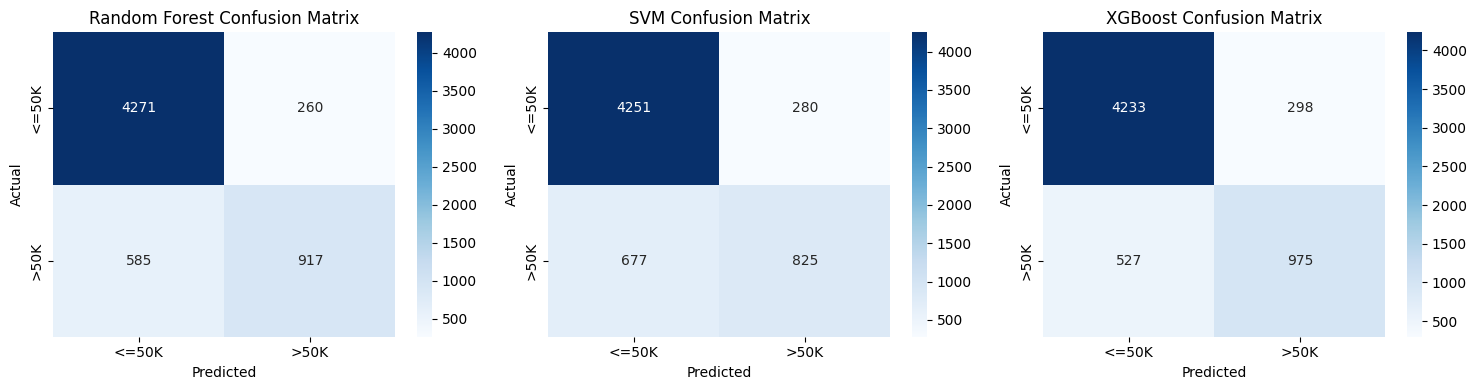

In [30]:
# Confusion Matrices for All Models
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, pred) in zip(axes, [('Random Forest', rf_pred), ('SVM', svm_pred), ('XGBoost', xgb_pred)]):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

---
# FINAL SUMMARY - TASK 2A: CLASSIFICATION

In [31]:
print("=" * 80)
print("FINAL SUMMARY - TASK 2A: CLASSIFICATION")
print("=" * 80)

print("\n" + "-" * 80)
print("PART 1: CNN IMAGE CLASSIFICATION (CIFAR-10)")
print("-" * 80)
print(f"Dataset: CIFAR-10")
print(f"Link: https://www.cs.toronto.edu/~kriz/cifar.html")
print(f"Number of Images: 60,000")
print(f"Target Variable: Object Category (10 classes)")
print(f"\nResults:")
print(f"  Accuracy:  {accuracy_cnn:.4f}")
print(f"  Precision: {precision_cnn:.4f}")
print(f"  Recall:    {recall_cnn:.4f}")
print(f"  F1 Score:  {f1_cnn:.4f}")
print(f"  AUC:       {auc_cnn:.4f}")

print("\n" + "-" * 80)
print("PART 2: TABULAR CLASSIFICATION (ADULT INCOME)")
print("-" * 80)
print(f"Dataset: Adult Income (Census Income)")
print(f"Link: https://archive.ics.uci.edu/ml/datasets/adult")
print(f"Number of Samples: 48,842")
print(f"Number of Features: 14")
print(f"Target Variable: Income (>50K or <=50K)")
print(f"\nResults:")
print(results_df.to_string(index=False))

print("\n" + "-" * 80)
print("OPTIMIZATION TECHNIQUES APPLIED")
print("-" * 80)
print("CNN: Data Augmentation, Batch Normalization, Dropout, Early Stopping, LR Scheduling")
print("RF:  n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2")
print("SVM: RBF kernel, StandardScaler, C=1.0, gamma='scale'")
print("XGB: n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.8, regularization")
print("=" * 80)

FINAL SUMMARY - TASK 2A: CLASSIFICATION

--------------------------------------------------------------------------------
PART 1: CNN IMAGE CLASSIFICATION (CIFAR-10)
--------------------------------------------------------------------------------
Dataset: CIFAR-10
Link: https://www.cs.toronto.edu/~kriz/cifar.html
Number of Images: 60,000
Target Variable: Object Category (10 classes)

Results:
  Accuracy:  0.8102
  Precision: 0.8150
  Recall:    0.8102
  F1 Score:  0.8074
  AUC:       0.9826

--------------------------------------------------------------------------------
PART 2: TABULAR CLASSIFICATION (ADULT INCOME)
--------------------------------------------------------------------------------
Dataset: Adult Income (Census Income)
Link: https://archive.ics.uci.edu/ml/datasets/adult
Number of Samples: 48,842
Number of Features: 14
Target Variable: Income (>50K or <=50K)

Results:
        Model  Accuracy  Precision   Recall  F1 Score      AUC
Random Forest  0.859937   0.779099 0.610519

## 🎯 PREDICTION TASK:
- **INPUT**: 32x32 color image
- **OUTPUT**: Object category (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)

---

In [32]:
# ================================================================
# IMPORTS FOR CNN PREDICTION
# ================================================================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load CIFAR-10 for demonstration
(X_train_img, y_train_img), (X_test_img, y_test_img) = keras.datasets.cifar10.load_data()
X_test_norm = X_test_img.astype('float32') / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("CIFAR-10 data loaded for prediction demonstration!")

CIFAR-10 data loaded for prediction demonstration!


In [33]:
# ================================================================
# FUNCTION TO PREDICT IMAGE CLASS
# ================================================================
def predict_image_class(image, model, class_names):
    """
    Predict the class of an image with confidence scores.

    Args:
        image: 32x32x3 image array (normalized to 0-1)
        model: Trained CNN model
        class_names: List of class names

    Returns:
        predicted_class: Predicted class name
        probabilities: Array of probabilities for each class
    """
    # Ensure image has batch dimension
    if len(image.shape) == 3:
        image = np.expand_dims(image, axis=0)

    # Get predictions
    probabilities = model.predict(image, verbose=0)[0]
    predicted_idx = np.argmax(probabilities)
    predicted_class = class_names[predicted_idx]

    print(f"\n*** PREDICTED CLASS: {predicted_class.upper()} ***")
    print(f"\nConfidence for each class:")

    # Sort by probability for display
    sorted_indices = np.argsort(probabilities)[::-1]
    for idx in sorted_indices:
        prob = probabilities[idx]
        bar = '█' * int(prob * 30)
        marker = " ◄── PREDICTED" if idx == predicted_idx else ""
        print(f"  {class_names[idx]:<12}: {bar} {prob*100:.1f}%{marker}")

    return predicted_class, probabilities

print("Function 'predict_image_class' created!")

Function 'predict_image_class' created!


In [34]:
# ================================================================
# SHOW SAMPLE PREDICTIONS WITH IMAGES
# ================================================================
# NOTE: Run this AFTER training the CNN model from Task 2A

def show_prediction_samples(model, X_test, y_test, class_names, n_samples=10):
    """
    Display sample predictions with actual images.
    """
    # Get predictions
    y_pred_proba = model.predict(X_test[:n_samples], verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = y_test[:n_samples].flatten()

    # Create figure
    fig, axes = plt.subplots(2, 5, figsize=(15, 7))
    axes = axes.flatten()

    print("SAMPLE IMAGE PREDICTIONS:")
    print("="*60)

    for i, ax in enumerate(axes):
        # Show image (unnormalized for display)
        ax.imshow(X_test_img[i])

        actual = class_names[y_true[i]]
        predicted = class_names[y_pred[i]]
        confidence = y_pred_proba[i][y_pred[i]] * 100

        correct = actual == predicted
        color = 'green' if correct else 'red'
        symbol = '✓' if correct else '✗'

        ax.set_title(f"{symbol} Pred: {predicted}\nActual: {actual}\nConf: {confidence:.1f}%",
                     color=color, fontsize=9)
        ax.axis('off')

        print(f"Image {i+1}: Actual={actual:<12} Predicted={predicted:<12} Confidence={confidence:.1f}% {symbol}")

    plt.suptitle('CNN Image Classification Predictions', fontsize=14)
    plt.tight_layout()
    plt.show()

# Uncomment after training CNN model:
# show_prediction_samples(cnn_model, X_test_norm, y_test_img, class_names)

In [35]:
# ================================================================
# SHOW CORRECTLY vs INCORRECTLY CLASSIFIED IMAGES
# ================================================================
def show_correct_and_wrong_predictions(model, X_test, y_test, class_names):
    """
    Show examples of correctly and incorrectly classified images.
    """
    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    y_true = y_test.flatten()

    correct_idx = np.where(y_pred == y_true)[0]
    wrong_idx = np.where(y_pred != y_true)[0]

    print(f"\n✅ CORRECTLY CLASSIFIED: {len(correct_idx)} out of {len(y_test)} ({len(correct_idx)/len(y_test)*100:.1f}%)")
    print(f"❌ MISCLASSIFIED: {len(wrong_idx)} out of {len(y_test)} ({len(wrong_idx)/len(y_test)*100:.1f}%)")

    # Show some correct predictions
    print("\n" + "="*60)
    print("CORRECTLY CLASSIFIED EXAMPLES:")
    print("="*60)

    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i, ax in enumerate(axes):
        idx = correct_idx[i]
        ax.imshow(X_test_img[idx])
        ax.set_title(f"✓ {class_names[y_true[idx]]}", color='green')
        ax.axis('off')
    plt.suptitle('Correctly Classified Images', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Show some wrong predictions
    print("\n" + "="*60)
    print("MISCLASSIFIED EXAMPLES:")
    print("="*60)

    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i, ax in enumerate(axes):
        if i < len(wrong_idx):
            idx = wrong_idx[i]
            ax.imshow(X_test_img[idx])
            ax.set_title(f"✗ Pred: {class_names[y_pred[idx]]}\nActual: {class_names[y_true[idx]]}",
                        color='red', fontsize=9)
            ax.axis('off')
    plt.suptitle('Misclassified Images', fontsize=12)
    plt.tight_layout()
    plt.show()

# Uncomment after training CNN model:
# show_correct_and_wrong_predictions(cnn_model, X_test_norm, y_test_img, class_names)